In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import pyodbc
import sklearn
import os


In [47]:
# Change this path to run in your machine
home_path = 'C:/Users/54911/OneDrive/Documentos/git_repos/elecciones2023-arg'

In [48]:
os.chdir(home_path)

In [49]:
political_posts = pd.read_csv('Elecciones + IA/modeling/Preparando_datos/political_posts.csv')


In [50]:
primera_vuelta_poly = pd.read_csv('Elecciones + IA/modeling/polynomial_surveys/data_built/normalize_primera_vuelta_poly.csv')
ballotaje_poly = pd.read_csv('Elecciones + IA/modeling/polynomial_surveys/data_built/normalize_ballotage_poly.csv')


In [52]:
political_posts['fecha'] = pd.to_datetime(political_posts['fecha'])
primera_vuelta_poly['Final'] = pd.to_datetime(primera_vuelta_poly['Final'])
primera_vuelta_poly['Inicio'] = pd.to_datetime(primera_vuelta_poly['Inicio'])

Let's see how the post is distribuided in each date range

In [100]:
amount_posts = np.zeros(len(primera_vuelta_poly))
for i in range (len(primera_vuelta_poly)):
    indx_row = i
    start = primera_vuelta_poly.iloc[indx_row]['Inicio']
    end = primera_vuelta_poly.iloc[indx_row]['Final']
    aux = political_posts[(political_posts['fecha']>start)& (political_posts['fecha']<end)]
    amount_posts[i] = len(aux)

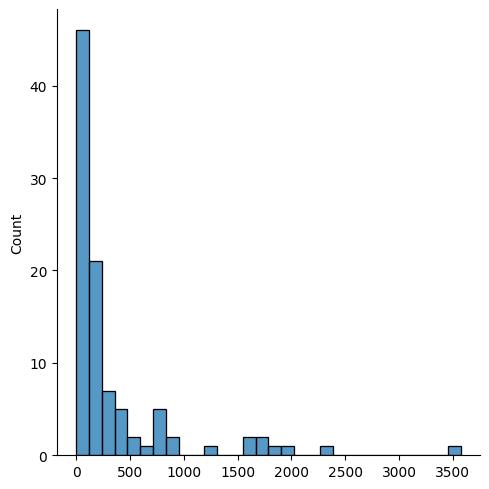

In [101]:
sns.displot(amount_posts)

In [113]:
amount_max = np.quantile(amount_posts,0.95)
amount_min = np.quantile(amount_posts,0.1)
filtered_index =  np.nonzero((amount_posts>amount_min) & (amount_posts<amount_max))

In [115]:
primera_vuelta_poly_filtered = primera_vuelta_poly.iloc[filtered_index]

In [116]:
def selecPostDate(survey, posts_data):
    res = []
    for indx_row in range (len(survey)):
        start = survey.iloc[indx_row]['Inicio']
        end = survey.iloc[indx_row]['Final']

        filtered_date = posts_data[(posts_data['fecha']>start)& (posts_data['fecha']<end)]
        
        res.append(filtered_date) 

    return res

In [119]:
separated_date_posts = selecPostDate(primera_vuelta_poly_filtered,political_posts)

fuente -> oneHotEncoding
fecha -> day,month,year
cantidad_likes -> mean values

In [132]:
lla

,id,fuente,cantidad_likes,fecha,partido
13,Cq9XukWvhAc,a24noticias,3697,2023-04-13 00:00:00,La Libertad Avanza
213,Cq-SjbVMcvf,infobae,2243,2023-04-13 00:00:00,La Libertad Avanza
233,Cq8oe3VP7Mu,filonewsok,5440,2023-04-12 00:00:00,La Libertad Avanza
388,CrBK2f0MP_e,infobae,1014,2023-04-14 00:00:00,La Libertad Avanza
389,Cq_Zvs_rLwD,infobae,1768,2023-04-13 00:00:00,La Libertad Avanza
390,Cq8_moKJDO3,infobae,728,2023-04-12 00:00:00,La Libertad Avanza
391,Cq8kJiIJxmN,infobae,14973,2023-04-12 00:00:00,La Libertad Avanza
392,Cq8EwvDNT5V,infobae,25588,2023-04-12 00:00:00,La Libertad Avanza
930,CrAy5L1vJug,lanacioncom,7143,2023-04-14 00:00:00,La Libertad Avanza
931,CrBBVJ6R_Ag,lanacioncom,1349,2023-04-14 00:00:00,La Libertad Avanza


In [131]:
prueba = separated_date_posts[15]
lla = prueba[prueba['partido']=='La Libertad Avanza'].drop_duplicates()
lla.groupby('fuente').mean()['cantidad_likes']

C:\Users\54911\AppData\Local\Temp\ipykernel_17604\1174212770.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  lla.groupby('fuente').mean()['cantidad_likes']


fuente
a24noticias      3697.000000
c5n              2969.000000
clarincom       10041.500000
filonewsok       5440.000000
infobae          7719.000000
lanacioncom      4407.666667
pagina12         3318.000000
todonoticias    27163.000000
tv_publica       1622.000000
Name: cantidad_likes, dtype: float64

In [126]:
lla['fuente'].value_counts()

lanacioncom     9
infobae         6
clarincom       4
pagina12        2
tv_publica      2
a24noticias     1
filonewsok      1
c5n             1
todonoticias    1
Name: fuente, dtype: int64

In [8]:
def para_entrenar(tabla_una_fecha,k,partidos,canales,datos_encuestas):
    
    encuesta_porcentajes = datos_encuestas[partidos].iloc[k]
    df = pd.DataFrame(columns=partidos)
    df_encuestas = pd.DataFrame(columns=partidos)
    fuentes_lista = canales
    
    agrupado_likes = tabla_una_fecha.groupby(['Partido','fuente'])['cantidad_likes'].median()
    fecha_median = tabla_una_fecha['fecha'].median()

    for p in list(partidos):

        if p in agrupado_likes.index:
            likes_partidos = agrupado_likes[p]
            fuentes_partido = likes_partidos.index
            likes_median = []

            for c in canales:
                if c in fuentes_partido:
                    likes_median.append(likes_partidos[c])
                else:
                    likes_median.append(0)
        
            df[p] = likes_median
        else:
            df[p] = [0]*len(canales)

        df_encuestas[p] = [encuesta_porcentajes[p]]*len(df)

    df_encuestas.rename(columns=lambda x: x+'_Encuestas',inplace=True)
    df['Fuente'] = fuentes_lista
    df['fecha_mediana'] = fecha_median

    res = pd.concat([df,df_encuestas],axis=1)

    return res

In [9]:
def juntar_tablas_preparadas(tabla_periodos,partidos,canales,datos_encuestas):
    #partidos = encuestas.columns[:5]
    tablas_entrenar = []
    for k,t in enumerate(tabla_periodos):
        tablas_entrenar.append(para_entrenar(t,k,partidos,canales,datos_encuestas))

    data = pd.concat(tablas_entrenar)
    return data

In [10]:
def separar_fecha(data):
    data['dia'] = ''
    data['mes'] = ''
    data['anio'] = ''
    data['dia'] = data['fecha_mediana'].map(lambda x:x.day)
    data['mes'] = data['fecha_mediana'].map(lambda x:x.month)
    data['anio'] = data['fecha_mediana'].map(lambda x:x.year)
    

In [11]:
def encoding_Fuente(tabla,fuentes):
    #fuentes_labels = publicaciones['fuente'].unique()
    numbers = [i+1 for i in range(len(fuentes))]
    simple_encoding = dict(zip(fuentes,numbers))
    tabla['Fuente'] = tabla['Fuente'].map(lambda x:simple_encoding[x])

In [12]:
def listo_para_entrenar(datos_publicaciones,datos_encuestas):
    fuentes = datos_publicaciones['fuente'].unique()
    partidos = datos_encuestas.columns.tolist()[:-2]

    datos_publicaciones['fecha'] = datos_publicaciones['fecha'].map(lambda x:pasar_a_datetime(x))
    datos_encuestas['Inicio'] = datos_encuestas['Inicio'].map(lambda x:pasar_a_datetime(x))
    datos_encuestas['Final'] = datos_encuestas['Final'].map(lambda x:pasar_a_datetime(x))

    #datos_publicaciones['cantidad_likes'].quantile(0.95)
    datos_publicaciones = datos_publicaciones[datos_publicaciones['cantidad_likes']<25000]

    tabla_periodos = seleccionar_publicaciones_fecha(datos_encuestas,datos_publicaciones)

    data = juntar_tablas_preparadas(tabla_periodos,partidos,fuentes,datos_encuestas)
    
    separar_fecha(data)
    encoding_Fuente(data,fuentes)
    return data

In [14]:
primera_vuelta_poly['Inicio'] = primera_vuelta_poly['Inicio'].map(lambda x : pasar_a_datetime(x))
primera_vuelta_poly = primera_vuelta_poly[primera_vuelta_poly['Inicio'].map(lambda x: x.year)==2023]
primera_vuelta_poly['Inicio'] = primera_vuelta_poly['Inicio'].map(lambda x : str(x))

In [15]:
data_primera_vuelta = listo_para_entrenar(publicaciones,primera_vuelta).dropna()
data_solo_ballotaje = listo_para_entrenar(publicaciones,solo_ballotaje).dropna()

In [16]:
data_encuestas_poly = listo_para_entrenar(publicaciones,primera_vuelta_poly).dropna()
data_ballotaje_poly = listo_para_entrenar(publicaciones,ballotaje_poly).dropna()

In [17]:
data_encuestas_poly.drop('anio',axis=1,inplace=True)
data_ballotaje_poly.drop('anio',axis=1,inplace=True)

In [21]:
data_primera_vuelta.to_csv('C:/Users/54911/OneDrive/Escritorio/Data Science/Elecciones + IA/modeling/Preparando_datos/data_primera_vuelta.csv',index=False)
#data_median.to_csv('C:/Users/54911/OneDrive/Escritorio/Data Science/Elecciones + IA/modeling/data_median.csv',index=False)
data_solo_ballotaje.to_csv('C:/Users/54911/OneDrive/Escritorio/Data Science/Elecciones + IA/modeling/Preparando_datos/data_solo_ballotaje.csv',index=False)

In [22]:
data_ballotaje_poly.to_csv('C:/Users/54911/OneDrive/Escritorio/Data Science/Elecciones + IA/modeling/Preparando_datos/data_ballotaje_poly.csv',index=False)
data_encuestas_poly.to_csv('C:/Users/54911/OneDrive/Escritorio/Data Science/Elecciones + IA/modeling/Preparando_datos/data_encuestas_poly.csv',index=False)